# Priors conjugados y aproximación en **grid**


## Priors conjugados, aproximación en grid

El teorema de Bayes permite actualizar nuestro conocimiento previo (prior) $P(\theta| M)$ con datos $D$ para pasar a la distribución posterior $P(\theta| D, M)$, donde los datos actualizan nuestro conocimiento sobre $\theta$.

De manera operativa la inferencia bayesianda require realizar integrales (o sumatorios) para calcular el denominador $P(D| M)$

Estas integrales son difíciles de realizar en el caso general. Sin embargo, hay casos donde es factible realizarlas:

 * Cuando hay pocos parámetros podemos discretizar (grid)
 
 * Para ciertas combinaciones de prior y verosimilitud (priors conjugados)
 


### Priors conjugados

Para ciertas combinaciones de prior y verosimilitud, el posterior tiene la misma forma que el prior (alguien ha hecho las integrales por nosotros). Esto funciona tanto para ciertas distribuciones discretas como continuas.

Por ejemplo, en la transparencia 4-28, en la Tabla 9.1 del libro de Lambert o en el artículo de wikipedia https://en.wikipedia.org/wiki/Conjugate_prior hay tablas de priors conjugados.

Dado que conocemos la forma funcional del posterior, el uso de los priors conjugados nos permite centrarnos únicamente en cómo se actualizan **los parámetros del posterior** a partir de los parámetros del prior y los datos

### Prior conjugado de la distribución de Poisson

El desarrollo del prior conjugado de la distribución de Poisson está explicado en la transparencia 4-20. Como recordatorios, la distribución de Poisson de un valor $x$ discreto depende de un parámetro continuo $\lambda$, $P(x|\lambda) = \frac{\lambda^x}{x!} e^{-\lambda}$

Esto implica que la verosimilitud es:
$$
\mathcal{L}(\lambda) = \prod_{i=1}^n \frac{\lambda^{x_i}}{{x_i}!} e^{-\lambda} \propto \lambda ^{\sum x_i}e^{-n \lambda} = \lambda ^{n\bar{x}}e^{-n \lambda}
$$

Mientras que la distribución gamma (continua, con parámetros $\alpha$ y $\beta$) es:

$$
P(\lambda|\alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda ^{\alpha -1}e^{-\beta \lambda} \propto \lambda ^{\alpha - 1}e^{-\beta \lambda}
$$


Esto implica que la verosimilitud es:
$$
\mathcal{L}(\lambda) = \prod_{i=1}^n \frac{\lambda^{x_i}}{{x_i}!} e^{-\lambda} \propto \lambda ^{\sum x_i}e^{-n \lambda} = \lambda ^{n\bar{x}}e^{-n \lambda}
$$

Mientras que la distribución gamma (continua, con parámetros $\alpha$ y $\beta$) es:

$$
P(\lambda|\alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda ^{\alpha -1}e^{-\beta \lambda} \propto \lambda ^{\alpha - 1}e^{-\beta \lambda}
$$

Esto implica que el posterior será $P(\lambda|D, \alpha, \beta) \propto \mathcal{L}(\lambda) \times P(\lambda|\alpha, \beta)$:

$$
P(\lambda|D, \alpha, \beta) \propto \lambda ^{n\bar{x}}e^{-n \lambda} \times \lambda ^{\alpha - 1}e^{-\beta \lambda}  \propto  \lambda ^{n\bar{x} + \alpha - 1 }e^{-(n + \beta) \lambda}
$$
El posterior tiene la forma funcional de la distribución gamma. Finalmente normalizamos.

$$
P(\lambda|D, \alpha, \beta) =  \mathrm{Gamma}(n\bar{x} + \alpha, n + \beta)
$$


En resumen, para una distribución de Poisson, si tomamos como prior para $\lambda$ una distribución Gamma, el posterior también es una distribución Gamma.

Si los parámetros del prior son $\alpha$ y $\beta$, los del posterior son $\alpha + n \bar{x}$ y $\beta + n$


$\beta$ se actualiza con el **número de observaciones** ($n$) y $\alpha$ con el **número de sucesos** ($n\bar{x} = \sum x_i$). Los parámetros del prior pueden representar *seudoobservaciones.*


Las mismas reglas de actualización sirven para el caso que utilicemos el posterior como prior de una nueva observación (tenemos diferentes tandas de datos)

## Estimación del número esperado de SN Ia

Un  grupo  de  investigadores  realiza  periódicamente  campañas  de  observación  con  un telescopio  especialmente  diseñado  para  llevar  a  cabo  exploraciones  de  gran  campo. Dichas  observaciones  permiten  obtener  imágenes  profundas  de  extensas  regiones  del cielo con la intención de descubrir supernovas de tipo Ia (SN Ia) en galaxias lejanas.

Suponemos que el número de SN Ia sigue una distribución de Poisson y queremos encontrar la distribución posterior del parámetro $\lambda$ (en número de SN Ia por noche)

Contamos con medidadas durante 8 noches para 30 regiones diferentes del cielo. Aunque podríamos utilizar las 8 medidas de una vez, vamos a ir midiendo noche a noche y de esa manera actualizamos la distribución posterior según nos llegan datos.

Lo que es más realista. No queremos tener que esperar a que termine nuestro proyecto (que puede durar años) para tener resultados.

El fichero `SNIa_medidas.csv` contiene 30 columnas y 8 filas. Cada columna representa una región diferente del cielo y cada fila un día.

Podemos leerlo con:

In [1]:
snIa = read.csv('SNIa_medidas.csv', header=FALSE, comment.char='#')

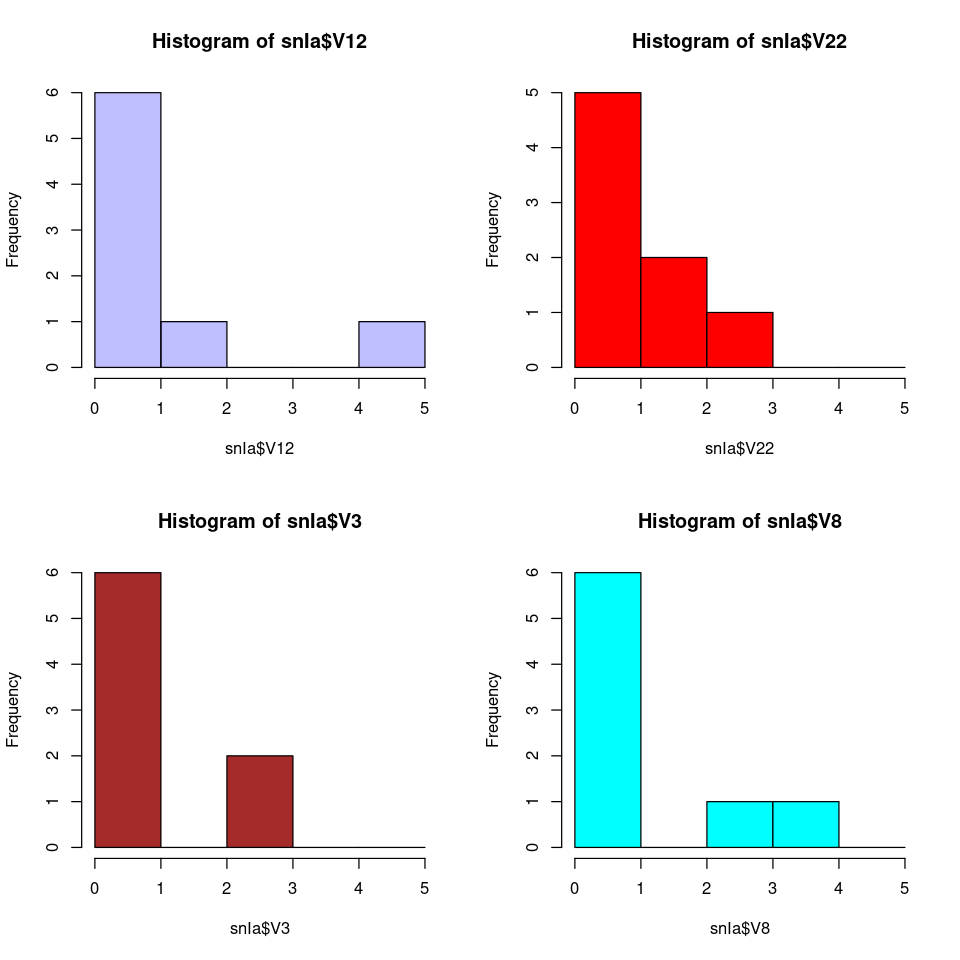

In [2]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
h1 = hist(snIa$V12, col=rgb(0,0,1,1/4))
hist(snIa$V22, col="red", breaks=h1$breaks)
hist(snIa$V3, col="brown", breaks=h1$breaks)
hist(snIa$V8, col="cyan", breaks=h1$breaks)

## Entregable

Vamos a calcular la distribución posterior de $\lambda$ para una región del cielo (seleccionar la columna con el número de grupo) para cada una de las 8 noches. Para ello:

* utilizaremos tres priors (para la primera noche)
  - Prior uniforme en $\lambda$ (entre 0 y 10).
  - Distribución gamma con $\alpha$=2 y $\beta$=1
  - Distribución gamma con $\alpha$=8.5 y $\beta$=2.5
* la distribución gamma en R está definida con la función `dgamma`
  - OJO: la función `dgamma` admite como parámetros `rate` ($\beta$) y `scale` (1 / $\beta$). En caso de duda comprobar [The distribution Zoo](https://ben18785.shinyapps.io/distribution-zoo/) o la documentación de R
 * la distribución de Poisson en R está definida con la función `dpois`
* para el prior uniforme hay que discretizar la distribución

 * Para los datos acumulados hasta cada noche de observación, representar en una misma gráfica el prior, la verosimilitud y la función de densidad posterior. 
  * El objetivo es  entender  cómo  van  cambiando  dichas  funciones  a  medida  que  contamos  con información  nueva.  
  * CUIDADO:  se  trata  de  ir  acumulando  información,  por  lo  que  es esencial que el prior de cada noche coincida con la función de densidad posterior derivada con los datos obtenidos hasta la noche anterior
 * Repetir las gráficas anteriores para **cada uno de los tres priores iniciales**.
 
 * Representar cómo va cambiando el valor esperado del parámetro $\lambda$, E[$\lambda$], a medida que acumulamos más información (para cada noche). 
   - Será muy ilustrativo comparar en esta gráfica los resultados que se obtienen al utilizar los tres priores iniciales distintos.
   - El valor esperado de la función gamma es $E[X] = \alpha / \beta$. Para el prior uniforme habrá que calcularlo numéricamente.
   - Calcular también la varianza (para la distribución gamma es VAR\[X\] = $\alpha$ / $\beta^2$)
   - Añadir a la comparación el estimador MLE de $\lambda$ (que para la distribución de Poisson es la media de los datos)